In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import pandas as pd

import model_service as ms

In [3]:
RANDOM_STATE=2025
dataset = pd.read_csv('../data/numerical_dataset_original.csv')
dataset.drop(['cik', 'subset', 'ticker', 'Fiscal Period'], axis=1, inplace=True)
flatten = True
enriched = False
oversampled = True

X_train, y_train, X_test, y_test = ms.get_data(dataset, flatten, enriched, oversampled, random_state=RANDOM_STATE)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7904, 85), (7904,), (447, 85), (447,))

In [4]:
labels = y_train.map({False: 'NotBankrupt', True: 'Bankrupt'}).reset_index(drop=True)
labels.value_counts()

label
Bankrupt       3952
NotBankrupt    3952
Name: count, dtype: int64

In [5]:
df = pd.DataFrame(X_train)
df['label'] = labels
features = [col for col in df.columns if col != 'label']

binned_df = pd.DataFrame()
for col in features:
    binned_df[col] = pd.qcut(df[col], q=3, labels=[f"{col}=Low", f"{col}=Medium", f"{col}=High"])

binned_df['label'] = df['label']

binned_df

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,label
0,0=Medium,1=Medium,2=Medium,3=Medium,4=Low,5=Low,6=Medium,7=High,8=Medium,9=Medium,...,76=High,77=Medium,78=Low,79=Medium,80=Medium,81=Medium,82=Low,83=Low,84=Medium,Bankrupt
1,0=High,1=Low,2=High,3=High,4=High,5=High,6=Low,7=Medium,8=Medium,9=Low,...,76=High,77=Low,78=Medium,79=High,80=High,81=High,82=Medium,83=High,84=Low,NotBankrupt
2,0=High,1=High,2=High,3=High,4=High,5=High,6=High,7=High,8=High,9=High,...,76=High,77=High,78=High,79=High,80=High,81=High,82=High,83=High,84=High,Bankrupt
3,0=High,1=High,2=High,3=High,4=High,5=High,6=High,7=High,8=Low,9=High,...,76=Low,77=High,78=High,79=High,80=High,81=High,82=High,83=High,84=High,NotBankrupt
4,0=Low,1=Low,2=High,3=High,4=Medium,5=High,6=Low,7=Medium,8=Medium,9=Low,...,76=High,77=Low,78=Medium,79=Low,80=Low,81=Low,82=Medium,83=Medium,84=Low,NotBankrupt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,0=High,1=Medium,2=Low,3=Low,4=High,5=High,6=Medium,7=Low,8=Low,9=High,...,76=Low,77=High,78=High,79=High,80=High,81=High,82=High,83=High,84=High,Bankrupt
7900,0=High,1=Medium,2=Medium,3=Medium,4=Low,5=Medium,6=High,7=Low,8=Low,9=High,...,76=Medium,77=Medium,78=Medium,79=Low,80=Medium,81=Low,82=Medium,83=Low,84=Low,Bankrupt
7901,0=Low,1=High,2=Medium,3=Low,4=Low,5=Low,6=Low,7=Medium,8=Medium,9=Low,...,76=Medium,77=Low,78=Low,79=Low,80=Low,81=Low,82=Low,83=Low,84=Medium,Bankrupt
7902,0=Low,1=Medium,2=Low,3=Low,4=Medium,5=Medium,6=High,7=High,8=High,9=High,...,76=High,77=High,78=High,79=Low,80=Medium,81=Medium,82=High,83=Medium,84=High,NotBankrupt


In [6]:
cols = list(binned_df.columns)
binned_df = binned_df[cols[0:11] + ['label']]
transactions = binned_df.values.tolist()
binned_df.head()

,0,1,2,3,4,5,6,7,8,9,10,label
0,0=Medium,1=Medium,2=Medium,3=Medium,4=Low,5=Low,6=Medium,7=High,8=Medium,9=Medium,10=Low,Bankrupt
1,0=High,1=Low,2=High,3=High,4=High,5=High,6=Low,7=Medium,8=Medium,9=Low,10=Medium,NotBankrupt
2,0=High,1=High,2=High,3=High,4=High,5=High,6=High,7=High,8=High,9=High,10=High,Bankrupt
3,0=High,1=High,2=High,3=High,4=High,5=High,6=High,7=High,8=Low,9=High,10=High,NotBankrupt
4,0=Low,1=Low,2=High,3=High,4=Medium,5=High,6=Low,7=Medium,8=Medium,9=Low,10=Medium,NotBankrupt


In [7]:
items = set()
for transaction in transactions:
    items.update(transaction)
print(items)

{'7=High', '6=High', '3=High', 'Bankrupt', '4=Medium', '10=High', '0=Low', '4=High', '3=Low', '6=Medium', '10=Low', '10=Medium', 'NotBankrupt', '4=Low', '5=Medium', '8=Medium', '8=Low', '5=High', '5=Low', '9=Medium', '9=High', '9=Low', '1=Low', '2=Low', '3=Medium', '0=High', '0=Medium', '7=Medium', '2=Medium', '1=Medium', '7=Low', '1=High', '2=High', '8=High', '6=Low'}


In [8]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
sample_df = df_encoded.sample(1000, random_state=42)

# Algorytm Apriori — znajdź często współwystępujące zbiory
frequent_itemsets = apriori(sample_df, min_support=0.1, use_colnames=True)
print(frequent_itemsets.head(10))

   support     itemsets
0    0.332     (0=High)
1    0.316      (0=Low)
2    0.352   (0=Medium)
3    0.316    (10=High)
4    0.330     (10=Low)
5    0.354  (10=Medium)
6    0.330     (1=High)
7    0.329      (1=Low)
8    0.341   (1=Medium)
9    0.314     (2=High)


In [10]:
# Reguły asocjacyjne
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

# Filtrowanie: tylko reguły prowadzące do bankructwa
bankrupt_rules = rules[rules['consequents'] == {'Bankrupt'}]

# Sortowanie malejąco po confidence
bankrupt_rules_sorted = bankrupt_rules.sort_values(by='confidence', ascending=False)

# Wyświetl reguły
print(bankrupt_rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                           antecedents consequents  support  confidence  \
1128         (3=Low, 10=Medium, 7=Low)  (Bankrupt)    0.104    0.852459   
3697  (2=Low, 3=Low, 10=Medium, 7=Low)  (Bankrupt)    0.102    0.850000   
733           (2=Low, 0=Medium, 7=Low)  (Bankrupt)    0.104    0.825397   
1126         (2=Low, 10=Medium, 7=Low)  (Bankrupt)    0.116    0.822695   
158                 (10=Medium, 7=Low)  (Bankrupt)    0.143    0.817143   
730           (2=Low, 0=Medium, 3=Low)  (Bankrupt)    0.102    0.809524   

          lift  
1128  1.783387  
3697  1.778243  
733   1.726772  
1126  1.721119  
158   1.709504  
730   1.693564  


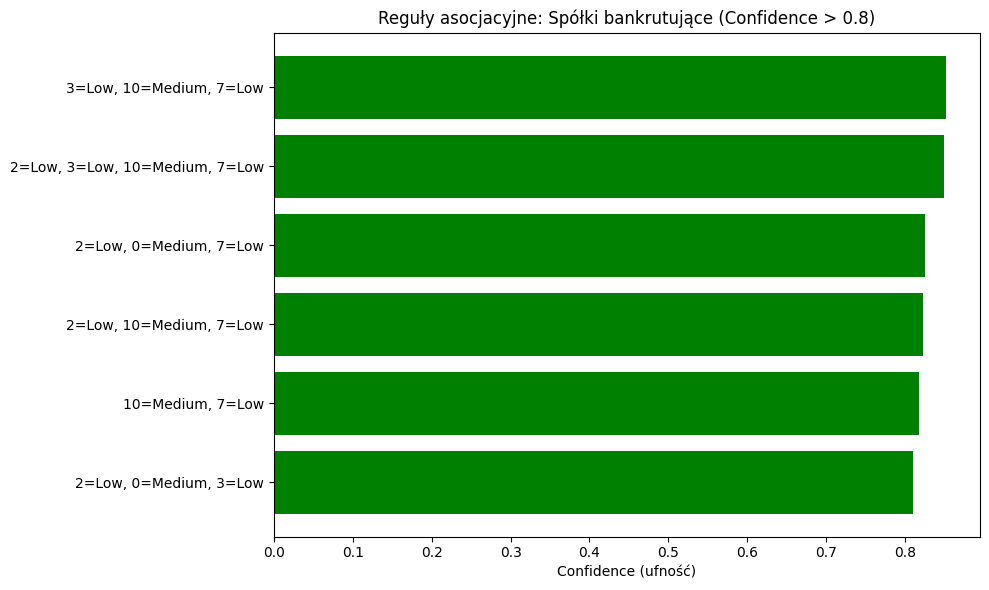

In [11]:
# Filtr tylko reguły Survived=True
survived_rules = bankrupt_rules_sorted[
    bankrupt_rules_sorted['consequents'].astype(str).str.contains("Bankrupt")
].head(10)

# Wykres słupkowy
plt.figure(figsize=(10, 6))
plt.barh(
    [", ".join(list(rule)) for rule in survived_rules['antecedents']],
    survived_rules['confidence'],
    color='green'
)
plt.xlabel("Confidence (ufność)")
plt.title("Reguły asocjacyjne: Spółki bankrutujące (Confidence > 0.8)")
plt.gca().invert_yaxis()  # Największe na górze
plt.tight_layout()
plt.show()

In [ ]:
# object_length_in_rows = 5

# dataset['object_id'] = dataset.index // object_length_in_rows
# # ostatnie obiekty z grupy
# last_objects = dataset.groupby('object_id').last().reset_index()

# last_features = last_objects.drop(columns=['label', 'object_id'])
# # Binarizacja: cecha > mediana => 1 (wysoka), inaczej 0 (nisko)
# binary_last_features = last_features.gt(last_features.median())
# binary_last_features['bankrupt'] = last_objects['label']
# binary_df = binary_last_features.astype(bool)
# binary_df.head()

